# Grouping Music Genres using Clustering

### The goal of this project is to group similar Music genres based on their features using clustering algorithms.
### After which we will explore different chracteristics about each group.

## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.


## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


## Data Inspection & Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [3]:
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

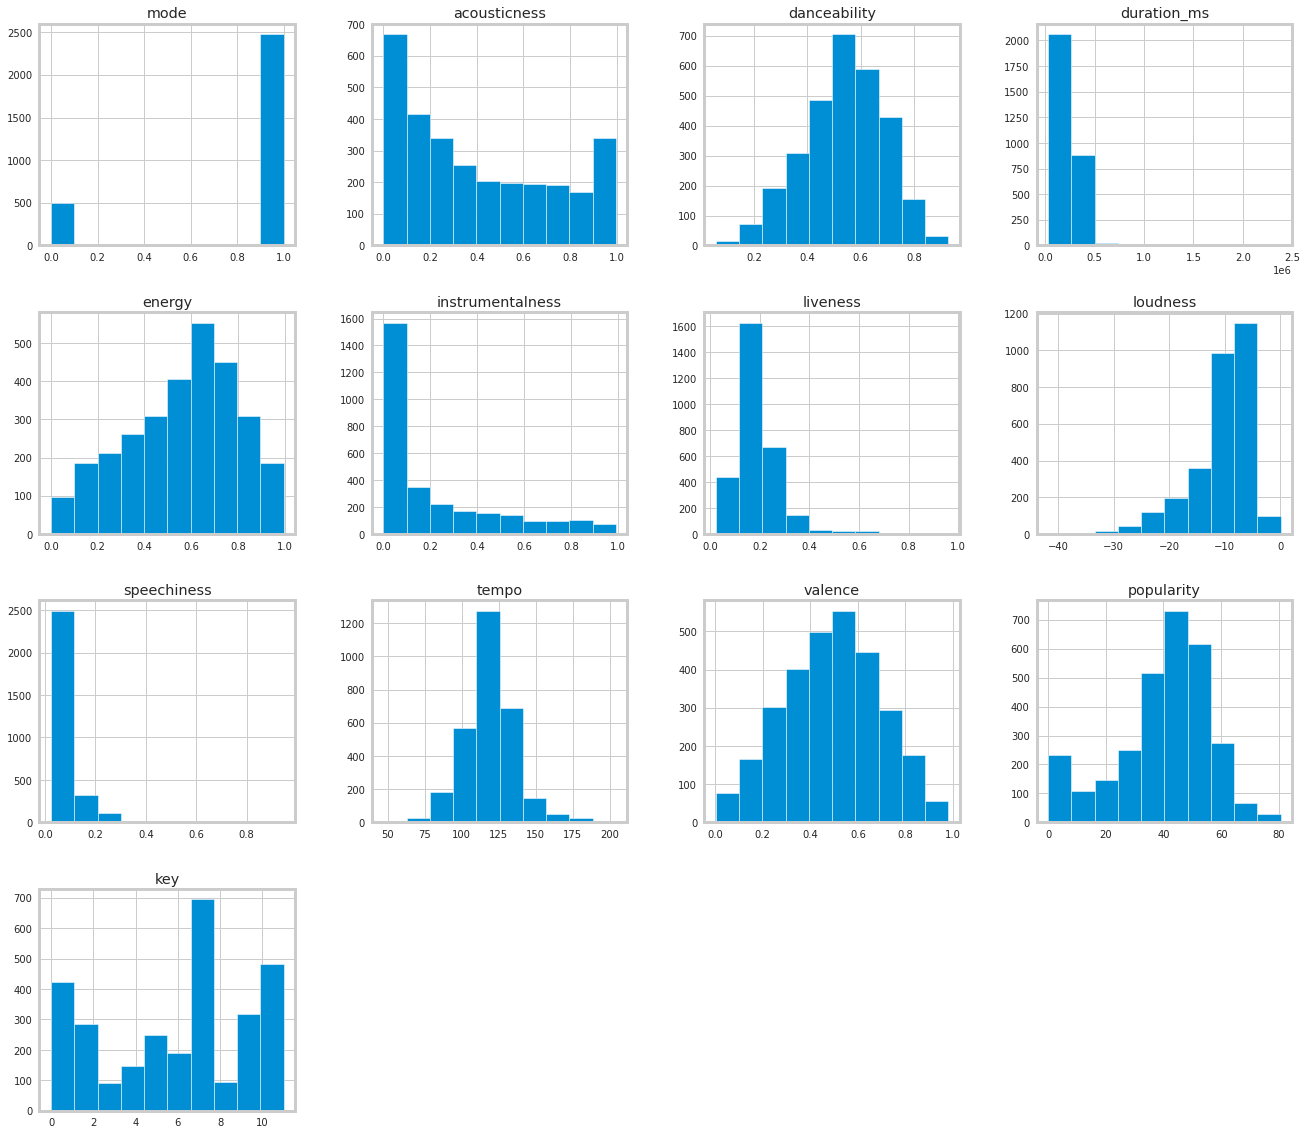

In [4]:
df.hist(figsize=(20, 20));

## Exploratory Data Analysis

## The 20 most danceable music genres.


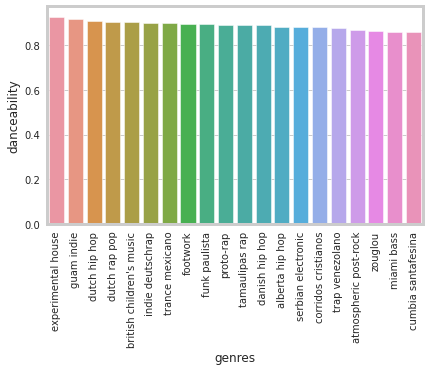

In [5]:
ax = sns.barplot(x= 'genres', y='danceability', data=df.nlargest(20,'danceability'));
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## The 20 lowest energy music genres.

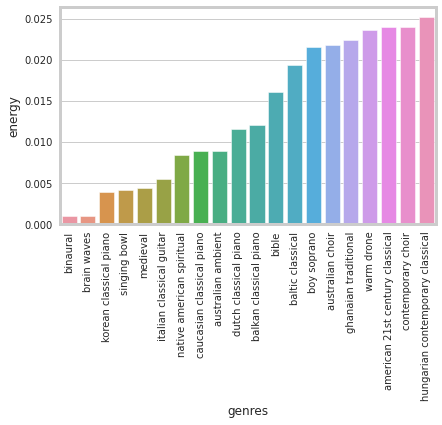

In [6]:
ax = sns.barplot(x= 'genres', y='energy', data=df.nsmallest(20,'energy'));
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## The 20 loudest music genres.

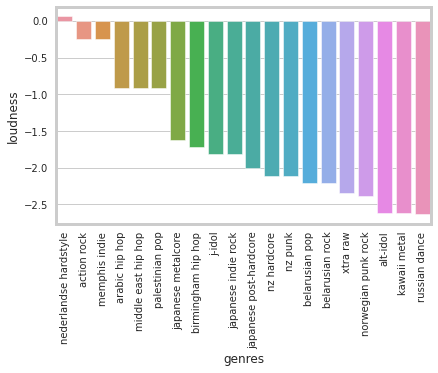

In [7]:
ax = sns.barplot(x= 'genres', y='loudness', data=df.nlargest(20,'loudness'));
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## The 20 music genres most commonly performed live.

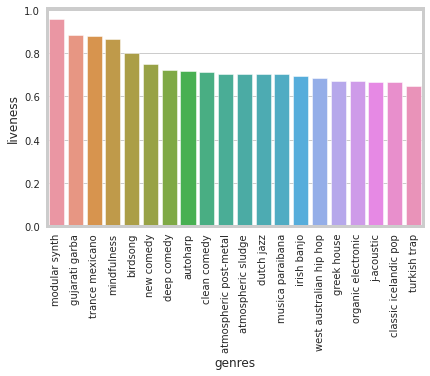

In [8]:
ax = sns.barplot(x= 'genres', y='liveness', data=df.nlargest(20,'liveness'));
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## The 20 most popular music genres.

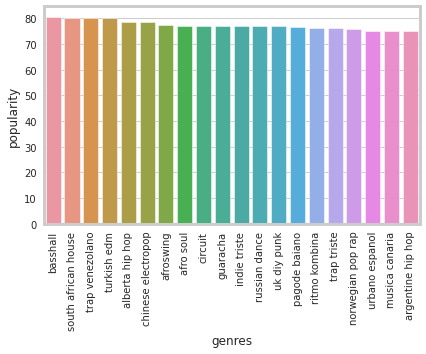

In [9]:
ax = sns.barplot(x= 'genres', y='popularity', data=df.nlargest(20,'popularity'));
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## Modelling

#### We Dont include the mode and key features in the cluster algorithm as they don't add value in terms of grouping genres.


In [10]:
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(df.drop(['mode','key','genres'], axis='columns'))

#### We choose the upper limit to be 30 as we only expect 8 to 10 clusters.

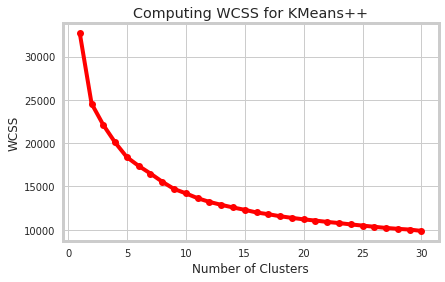

In [11]:
from sklearn.cluster import KMeans
wcss = []
for k in range( 1, 31 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(scaled_data)
    wcss.append( kmeans.inertia_ )
    
plt.plot(range(1, 31), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### From the graph above we choose 10 as our number of clusters, then we add the clusters to our dataset.

In [12]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

df["cluster"] = cluster_labels

## Cluster Visualization & Interpretation

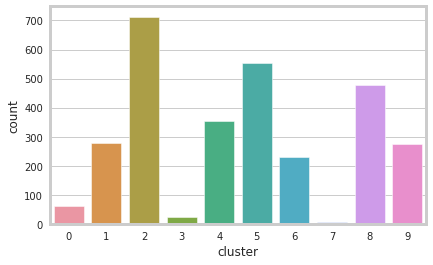

In [13]:
sns.countplot(x='cluster', data=df)

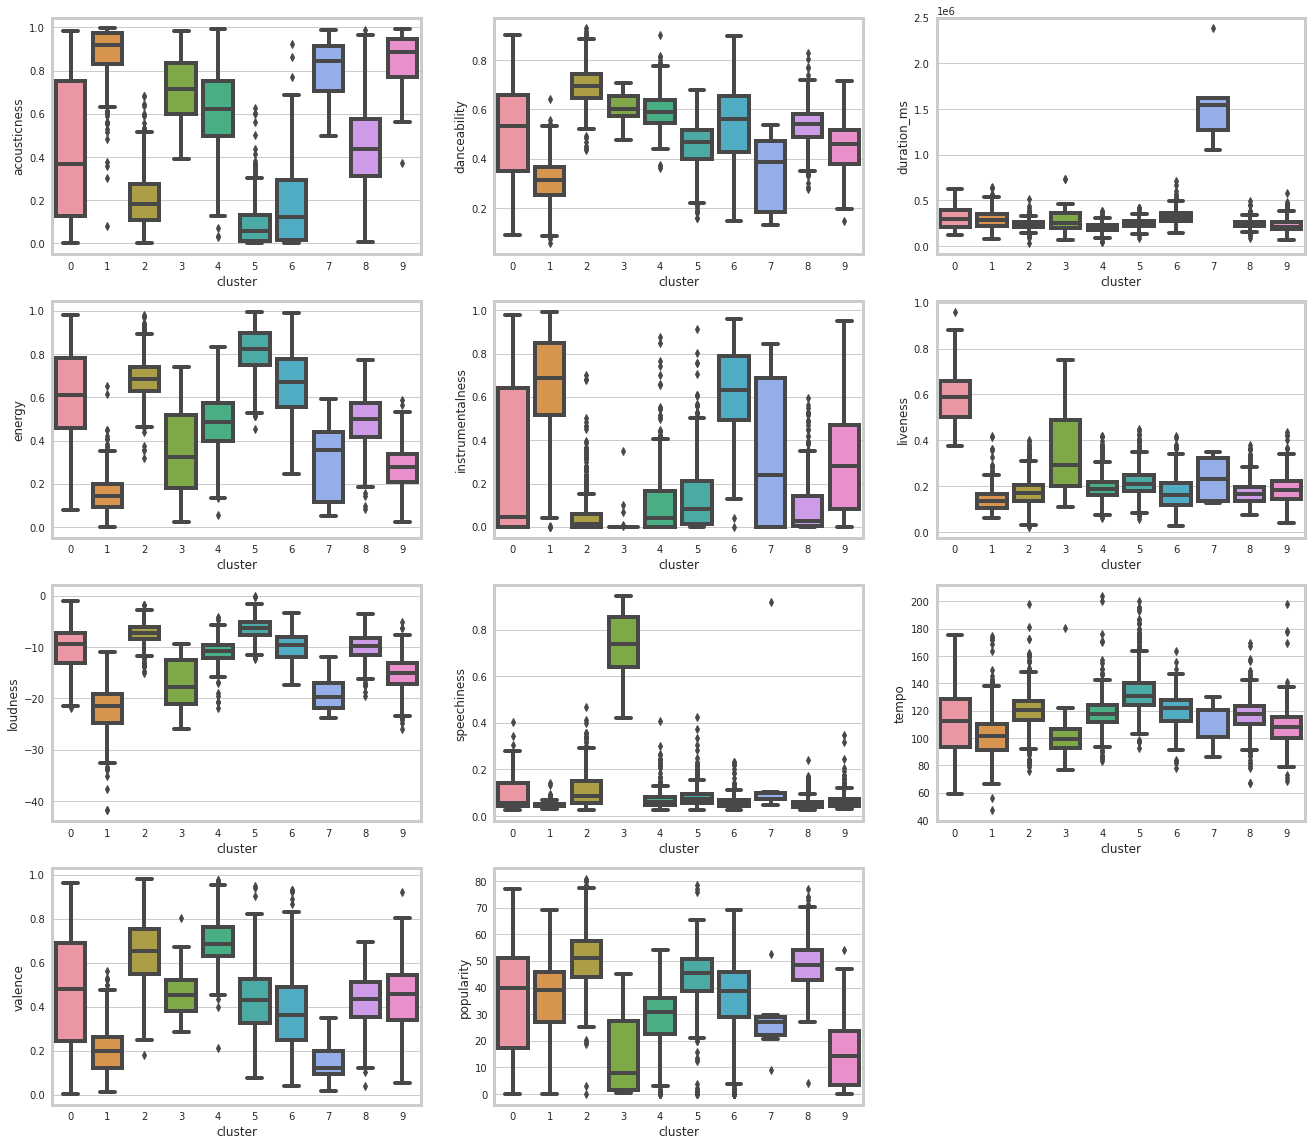

In [14]:
cols = df.select_dtypes('number').columns.drop(['mode','key','cluster'])
n = int(len(cols)**(1/2))

plt.figure(figsize=(20,20))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=df)

#### We Extract a group of genres from each cluster to learn more about the clusters.

In [15]:
df[df['cluster']==0].sample(6)[['genres']]

,genres
1864,musica paraibana
2552,spa
1969,noise punk
2743,trance mexicano
828,deep progressive house
1563,jig and reel


In [16]:
df[df['cluster']==0].sample(6)[['genres']]

,genres
2851,vaudeville
597,classic icelandic pop
105,arabic hip hop
1594,khaleeji iraqi
2924,west australian hip hop
1826,modular synth


In [17]:
df[df['cluster']==1].sample(6)[['genres']]

,genres
83,american primitive
1030,finnish contemporary classical
2135,pibroch
1823,modern string quartet
741,czech classical piano
1283,healing


In [18]:
df[df['cluster']==2].sample(6)[['genres']]

,genres
1578,kaneka
922,dutch pop
2857,venezuelan hip hop
1112,funk
799,deep dance pop
2707,tex-mex


In [19]:
df[df['cluster']==3].sample(6)[['genres']]

,genres
1931,new comedy
1692,magyar alternative
2309,reading
1649,latino comedy
2152,poetry
1602,kleine hoerspiel


In [20]:
df[df['cluster']==4].sample(6)[['genres']]

,genres
1942,new orleans blues
2451,sertanejo
300,blues
1597,kindie rock
838,deep southern soul
2888,vintage spanish pop


In [21]:
df[df['cluster']==5].sample(6)[['genres']]

,genres
2872,viking metal
1189,glam punk
1035,finnish metal
2902,virginia punk
2844,vancouver punk
2301,rap metal


In [22]:
df[df['cluster']==6].sample(6)[['genres']]

,genres
2909,vocal trance
235,bass music
1546,jazz organ
2871,viking folk
205,balearic
1186,ghent indie


In [23]:
df[df['cluster']==7].sample(6)[['genres']]

,genres
401,bulgarian experimental
1,432hz
1297,histoire pour enfants
1775,microtonal
1879,musique pour enfants
2074,oratory


In [24]:
df[df['cluster']==8].sample(6)[['genres']]

,genres
1901,neo mellow
2191,pop soul
447,canadian psychedelic
1724,medieval folk
2172,pop chileno
65,ambient folk


In [25]:
df[df['cluster']==9].sample(6)[['genres']]

,genres
1552,jazz saxophone
1301,historic string quartet
1593,keroncong
1458,italian progressive metal
744,dabke
2557,spanish classical


## Conclusions:
- Cluster 0 is small minority and have a wide range of acoustincness and the most performed live.
- Cluster 1 is rarely performed live and have a very high acoustincness and aren't danceable genres and are mostly insturmentals with low energy, low volume and slow tempo. 
- Cluster 2 represent the most common group and is very danceable to , very loud genres , quite popular , very low instrumentals and not often performed live.
- Cluster 3 have small minority with very high speechness , very low insturmantalness and low popularity.
- Cluster 4 also have low insturmantalness but with low speechness and high valence.
- Cluster 5 have very low acoustincness , very high energy and the highest tempo.
- Cluster 6 also have low acoustincness , high insturmantalness with low speechness.
- Cluster 7 is the least common group which have very high duration low volume (loudness) and low valence.
- Cluster 8 have very low speechness but is popular.
- Cluster 9 is less popular with high acoustincness.

## Creating a method to provide recommendations for users.

In [26]:
def genre_recommender (genre):
    genrecluster = df[df['genres']==genre]['cluster'].values[0]
    dfgenres = df[df['cluster']==genrecluster]['genres'].sample(6).values
    dfgenres = pd.DataFrame(dfgenres, columns =['Similar Genres :']) 

    return(dfgenres)

#### Method Test :

In [27]:
genre_recommender('jazz')

,Similar Genres :
0,french soundtrack
1,syrian pop
2,cabaret
3,dansktop
4,jazz violin
5,christelijk
